In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
!cd yolov5 & pip install -r requirements.txt

  Using cached GitPython-3.1.29-py3-none-any.whl (182 kB)
  Using cached ipython-8.7.0-py3-none-any.whl (761 kB)
  Using cached matplotlib-3.6.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached psutil-5.9.4-cp36-abi3-win_amd64.whl (252 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached decorator-5.1.1-py3-none-any.whl (9.1 kB)
  Using cached stack_data-0.6.2-py3-none-any.whl (24 kB)
  Using cached jedi-0.18.2-py2.py3-none-any.whl (1.6 MB)
  Using cached prompt_toolkit-3.0.36-py3-none-any.whl (386 kB)
  Using cached matplotlib_inline-0.1.6-py3-none-any.whl (9.4 kB)
  Using cached grpcio-1.51.1-cp310-cp310-win_amd64.whl (3.7 MB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached prot

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python310\\Scripts\\markdown_py.exe' -> 'C:\\Python310\\Scripts\\markdown_py.exe.deleteme'

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Rashmi Dsouza/.cache\torch\hub\ultralytics_yolov5_master
requirements: YOLOv5 requirements "gitpython" "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 2 packages updated per C:\Users\Rashmi Dsouza\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2022-12-12 Python-3.9.7 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

3. Make Detections with Images


In [5]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 656.7ms pre-process, 207.0ms inference, 11.0ms NMS per image at shape (1, 3, 384, 640)


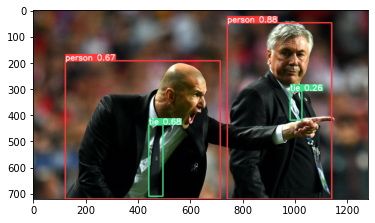

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [54, 20, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [72, 50, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 47],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

5. Train from scratch


In [5]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 50 --data coco.yaml --weights yolov5s.pt --workers 2

^C


requirements: YOLOv5 requirements "gitpython" "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 2 packages updated per C:\Users\Rashmi Dsouza\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2022-12-12 Python-3.9.7 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


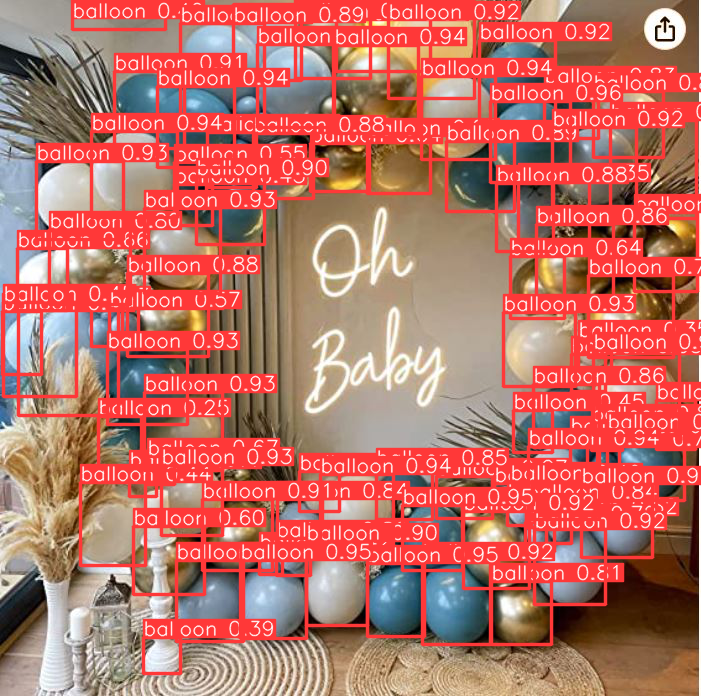

          xmin        ymin        xmax        ymax  confidence  class     name
0   490.033417  101.492523  570.743835  182.229797    0.958514      0  balloon
1   402.554108  505.461609  462.735474  570.434204    0.953191      0  balloon
2   240.353607  560.182678  306.257263  638.319214    0.951748      0  balloon
3   593.408203  350.628021  679.785095  435.486206    0.951378      0  balloon
4   367.999756  563.849121  424.619080  636.756287    0.948815      0  balloon
..         ...         ...         ...         ...         ...    ...      ...
82  571.487122  354.296906  605.027466  391.845184    0.332728      0  balloon
83  207.495743  132.261963  256.396088  187.207657    0.295535      0  balloon
84  436.043457  476.069427  492.951569  518.279236    0.271270      0  balloon
85   91.428810  309.520935  122.600540  346.507721    0.257259      0  balloon
86   98.991516  416.556549  141.186203  476.428528    0.250939      0  balloon

[87 rows x 7 columns]


In [6]:
import torch
#model = torch.hub.load('.', 'custom', path='yolov5/runs/train/exp8/weights/best.pt', source='local') 
model = torch.hub.load('yolov5','custom', path='yolov5/runs/train/exp8/weights/best.pt',force_reload=True,source='local')

# Image
img = "test.jpg"
# Inference
results = model(img)
# Results, change the flowing to: results.show()
results.show()  # or .show(), .save(), .crop(), .pandas(), etc
print(results.pandas().xyxy[0])

In [6]:
!rm -f data/train/labels.npy

'rm' is not recognized as an internal or external command,
operable program or batch file.
